In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataCawapres/gibran.csv', index_col = 0)
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Mon Dec 25 11:29:06 +0000 2023,1739246886425694408,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",0,0,0,0,in,1678809428504743938,1739246886425694408,jaenabeti261330,https://twitter.com/jaenabeti261330/status/173...
1,Mon Dec 25 11:29:02 +0000 2023,1739246873620389900,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",0,0,0,0,in,1678681664615227392,1739246873620389900,AsepSusant,https://twitter.com/AsepSusant/status/17392468...
2,Mon Dec 25 11:28:59 +0000 2023,1739246860181897634,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",0,0,0,0,in,1678338299054919680,1739246860181897634,nawang_nugroho,https://twitter.com/nawang_nugroho/status/1739...
3,Mon Dec 25 11:28:57 +0000 2023,1739246851415740469,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",0,0,0,0,in,1493831656469409796,1739234052711047409,h68052,https://twitter.com/h68052/status/173924685141...
4,Mon Dec 25 11:28:57 +0000 2023,1739246851168284898,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",0,0,0,0,in,1673581261791854594,1739246851168284898,elisuwarsih,https://twitter.com/elisuwarsih/status/1739246...
...,...,...,...,...,...,...,...,...,...,...,...,...
363,Mon Dec 25 11:06:24 +0000 2023,1739241176497267013,@VIVAcoid lahhh katanya silahkan cek di gugel ...,0,0,0,0,in,1640312632031985666,1739203845719515410,zidnsptra,https://twitter.com/zidnsptra/status/173924117...
364,Mon Dec 25 11:06:23 +0000 2023,1739241170121929179,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,0,2,0,0,in,1534200395009904640,1738452737879376073,Gr4sssss,https://twitter.com/Gr4sssss/status/1739241170...
365,Mon Dec 25 11:05:49 +0000 2023,1739241029432418730,Solo membuktikan bahwa Prabowo - Gibran punya ...,0,0,0,0,in,1678709385529524224,1739241029432418730,soemardihasan,https://twitter.com/soemardihasan/status/17392...
366,Mon Dec 25 11:05:46 +0000 2023,1739241015922610469,@janganlupasans @racunsay @gibran_tweet tapi f...,0,0,0,0,in,4046649492,1738915961129029791,nilrofficial,https://twitter.com/nilrofficial/status/173924...


In [3]:
df = df[['full_text', 'username', 'created_at']] # mengambil kolom full_text, username, dan created_at
df # menampilkan dataframe

,full_text,username,created_at
0,"Gibran bikin Solo eksis, Cak Imin mungkin masi...",jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,"Gibran berhasil bikin Solo eksis, Cak Imin mun...",AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,"Gibran bikin Solo jadi pusat perhatian, Cak Im...",nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,"@VIVAcoid Urang Jabar, naha ikhlas disebut keu...",h68052,Mon Dec 25 11:28:57 +0000 2023
4,"Gibran gesit, Cak Imin agak lambat Kira-kira h...",elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,@VIVAcoid lahhh katanya silahkan cek di gugel ...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,@Dimasjoko12 @bentangnegeri @gibran Yang penti...,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,Solo membuktikan bahwa Prabowo - Gibran punya ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,@janganlupasans @racunsay @gibran_tweet tapi f...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


## 1. Cleaning Data


In [4]:
# kegunaannya untuk mengetahui jumlah baris dan kolom dari dataframe
df.shape 

(368, 3)

In [5]:
# menghapus data duplikat berdasarkan kolom full_text
df = df.drop_duplicates(subset=['full_text'])

In [6]:
# mengecek apakah masih ada data duplikat
df.duplicated().sum()

0

In [7]:
# menghapus baris yang memiliki nilai NaN atau null
df = df.dropna()

In [8]:
# mengecek apakah masih ada nilai NaN atau null
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [9]:
# mengecek apakah ada perubahan jumlah baris
df.shape

(368, 3)

In [10]:
# pembuatan function untuk melakukan pembersihan
def clean_twitter_texr(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#\w+', '', text) # menghapus hastag
    text = re.sub(r'RT[\s]+', '', text) # menghapus retweet
    text = re.sub(r'https?://\S+', '', text) # menghapus url/link

    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) # menghapus simbol (non-alfanumerik)
    text = re.sub(r'\s+', ' ', text).strip() # menghapus spasi yang berlebihan

    return text

# menerapkan function untuk pembersihan teks
df['full_text'] = df['full_text'].apply(clean_twitter_texr)

In [11]:
# mengubah teks menjadi huruf kecil
df['full_text'] = df['full_text'].str.lower() 

In [12]:
# mengecek apakah ada perubahan
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kira kira ha...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,lahhh katanya silahkan cek di gugel udah banya...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa prabowo gibran punya re...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tweet tapi fans nya yg muslim pada gaterima be...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


   ## 2. Preprocessing
   - Normalisasi
   - Stopword
   - Tokenize
   - Stemming



#### 2.1 Normalisasi

In [13]:
# Normalisasi

# ini adalah proses mengganti kata yang salah dengan kata yang benar
# karena ini adalah bagian data anies, maka kita juga akan menghapus jika ada nama prabowo atau ganjar
# norm adalah dictionary yang berisi kata yang salah dan kata yang benar
norm = {" yg " : " yang ", 
        " prabowo " : " ", 
        # " cak imin " : " ", 
        # " imin " : " ", 
        # " muhaimin " : " ", 
        " anies " : " ", 
        " aniesmuhaimin " : " ", 
        # " mahfud " : " ", 
        " ganjar " : " ", 
        " ganjarmahfud " : " ", 
        " gugel " : " google ", 
        "pram " : " ", 
        " ngga " : " tidak ", 
        " nggak " : " tidak ", 
        " ga " : " tidak ", 
        " gak " : " tidak ", 
        "lahhh " : " ", 
        " vibes " : " suasana ", 
        " text " : " teks ", 
        " mantab " : " keren ", 
        " end " : " selesai ", 
        " kelen " : " kalian ", 
        " jd " : " jadi ", 
        " gt " : " gitu ", 
        " spt " : " seperti ", 
        " tuk " : " untuk ", 
        " bangetdari " : " banget dari ", 
        " disampaikam " : " disampaikan ", 
        " kk " : " kakak "}

# membuat function normalisasi 
def normalisasi(str_text):
    # perulangan ini bertujuan untuk mengganti kata yang salah dengan kata yang benar diatas
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

# menerapkan function
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))

# mengecek apakah ada perubahan
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin masih...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin agak lambat kira kira ha...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek di google udah banyak sw...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,yang penting bukan petugas partai apalagi bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan bahwa gibran punya rencana ek...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tweet tapi fans nya yang muslim pada gaterima ...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


#### 2.2 Stopwords

In [14]:
# %pip install Sastrawi

In [15]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# ini akan membuang kata kata yang tidak memiliki bobot, contohnya kata di, yang, dengan, dan lain lain
# disini saya tambahkan kata "tidak", karena saya merasa ini juga tidak memiliki bobot
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda X: stopword(X))
df

,full_text,username,created_at
0,gibran bikin solo eksis cak imin mungkin menca...,jaenabeti261330,Mon Dec 25 11:29:06 +0000 2023
1,gibran berhasil bikin solo eksis cak imin mung...,AsepSusant,Mon Dec 25 11:29:02 +0000 2023
2,gibran bikin solo jadi pusat perhatian cak imi...,nawang_nugroho,Mon Dec 25 11:28:59 +0000 2023
3,urang jabar naha ikhlas disebut keun bakal nga...,h68052,Mon Dec 25 11:28:57 +0000 2023
4,gibran gesit cak imin lambat kira kira harusny...,elisuwarsih,Mon Dec 25 11:28:57 +0000 2023
...,...,...,...
363,katanya silahkan cek google udah banyak swast...,zidnsptra,Mon Dec 25 11:06:24 +0000 2023
364,penting bukan petugas partai bokeper,Gr4sssss,Mon Dec 25 11:06:23 +0000 2023
365,solo membuktikan gibran punya rencana ekonomi ...,soemardihasan,Mon Dec 25 11:05:49 +0000 2023
366,tweet fans nya muslim gaterima beliau dibaptis...,nilrofficial,Mon Dec 25 11:05:46 +0000 2023


#### 2.3 Tokenize

In [16]:
# Tokenize

# kegunaan tokenize ini adalah untuk memecah teks menjadi kata-kata
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [gibran, bikin, solo, eksis, cak, imin, mungki...
1      [gibran, berhasil, bikin, solo, eksis, cak, im...
2      [gibran, bikin, solo, jadi, pusat, perhatian, ...
3      [urang, jabar, naha, ikhlas, disebut, keun, ba...
4      [gibran, gesit, cak, imin, lambat, kira, kira,...
                             ...                        
363    [katanya, silahkan, cek, google, udah, banyak,...
364           [penting, bukan, petugas, partai, bokeper]
365    [solo, membuktikan, gibran, punya, rencana, ek...
366    [tweet, fans, nya, muslim, gaterima, beliau, d...
367    [solo, sukses, bawah, gibran, bukti, perubahan...
Name: full_text, Length: 368, dtype: object

#### 2.4 Stemming

In [17]:
# Stemming

# # fungsinya untuk mengubah kata yang tadinya memiliki imbuhan menjadi kata dasar
# # contoh : menipu menjadi tipu

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for w in text_cleaning:
#         dt = stemmer.stem(w)
#         do.append(dt)
#     d_clean = []
#     d_clean = ' '.join(do)
#     print(d_clean)
#     return d_clean

# tokenized = tokenized.apply(stemming)

# # karena proses ini lama, kita akan ngebackup data ke dalam csv, agar kedepannya tidak perlu melakukan proses ini lagi
# # menyimpan data ke dalam csv 

# tokenized.to_csv('dataPreprocessing/dataPreprocessingGibran.csv', index=False)


## 3. Translate

In [18]:
# %pip install translate

In [19]:
# memasukkan data hasil stemming ke dalam dataframe
data = pd.read_csv('dataPreprocessing/dataPreprocessingGibran.csv', index_col=0)
data

#kenapa atributnya cuma 1 yaitu full_text? karena untuk proses pengolahan labeling ataupun analisis datanya kita hanya memerlukan atribut komentar dari masyarakat yaitu full_text

,full_text
0,gibran bikin solo eks cak imin mungkin cari pa...
1,gibran hasil bikin solo eks cak imin mungkin a...
2,gibran bikin solo jadi pusat perhati cak imin ...
3,urang jabar naha ikhlas sebut keun bakal ngadu...
4,gibran gesit cak imin lambat kirakira harus gi...
...,...
345,makasih udah wakil pen banget ngomong goblok t...
346,nyata beda jauh sama bapak bagaiman jadi indon...
347,tentang mas gibran sanggup jawab segala ragu p...
348,ngeles dr pertama gibran sdh langgar sdh ingat...


In [20]:
# from translate import Translator

# # fungsi ini berguna untuk mengubah teks dari bahasa indonesia menjadi bahasa inggris
# def convert_eng(tweet):
#     translator = Translator(to_lang="en", from_lang="id")
#     translation = translator.translate(tweet)
#     return translation

# # bagian mengapply fungsi di atas ke dalam data
# data['tweet_english'] = data['full_text'].apply(convert_eng)

# # menyimpan/backup data ke dalam csv, karena proses ini lumayan lama, jadi kedepannya agar tidak perlu running bagian ini lagi
# data.to_csv('dataTerjemahan/dataTerjemahanGibran.csv', index=False)

## 4. Labeling

In [21]:
# memasukkan data hasil terjemahan ke dalam dataframe
data = pd.read_csv('dataTerjemahan/dataTerjemahanGibran.csv', index_col=0)
data

,full_text,tweet_english
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...
3,ijin tamu,guest permissions
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...
...,...,...
338,makanya kalo ngomong sering tanya nyambung jawab,so if you talk often ask and answer
339,kandang monyet bahagia wkwkakak,happy monkey cage wkwkakak
340,tegas paspampres waktu mau minta maaf karna ke...,firmly passpampres when you want to apologize ...
341,kompak banget buruh jepara puji gibran dekade08,very compact japanese laborers praise gibran d...


In [22]:
# mengambil data sebanyak 275 untuk analisis sentimen
data = data.head(275)
data

,full_text,tweet_english
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...
3,ijin tamu,guest permissions
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...
...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...
273,gibran sukses sukses bikin bingung,gibran success success to confuse


In [23]:
# %pip install tweet-preprocessor
# %pip install textblob
# %pip install wordcloud
# %pip install nltk

In [24]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# nltk.download('all')


[nltk_data] Downloading package punkt to C:\Users\LEGION SLIM
[nltk_data]     7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = [] # untuk melihat status sentimen
total_positif = total_negatif = total_netral = total = 0

# proses labeling
for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas = analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 135
Netral = 94
Negatif = 46

Total Data: 275


In [26]:
data['klasifikasi'] = status
data

C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27904\1790800269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi'] = status


,full_text,tweet_english,klasifikasi
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...,Negatif
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral
3,ijin tamu,guest permissions,Netral
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral
...,...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...,Negatif
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...,Positif
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...,Positif
273,gibran sukses sukses bikin bingung,gibran success success to confuse,Positif


## 5. Visualisasi

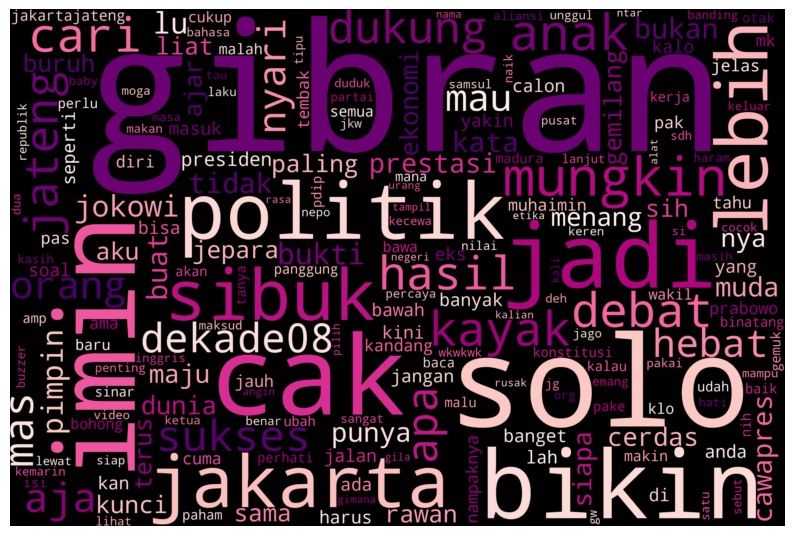

In [27]:
from wordcloud import WordCloud, STOPWORDS

# kita akan menampilkan visualisasi workcloud atau menampilkan beberapa data yang memiliki kuantitas yang tinggi
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

all_words = ' '.join([tweet for tweet in data['full_text']])

wordcloud = WordCloud(
    width=3000, 
    height=2000, 
    random_state=3, 
    background_color='black', 
    colormap='RdPu',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

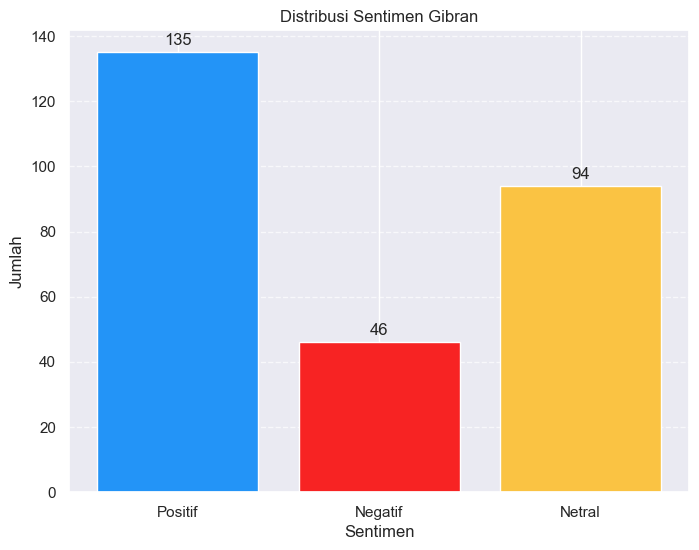

In [28]:
import seaborn as sns

# set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Gibran")

## 6. Klasifikasi Naive Bayes

In [29]:
data

,full_text,tweet_english,klasifikasi
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...,Negatif
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral
3,ijin tamu,guest permissions,Netral
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral
...,...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...,Negatif
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...,Positif
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...,Positif
273,gibran sukses sukses bikin bingung,gibran success success to confuse,Positif


In [30]:
dataset = data.drop('full_text', axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [31]:
import random

# inisialisasi sentiment
set_positif = []
set_negatif = []
set_netral = []

# membagi data menjadi 3 bagian
# jika sentimennya positif, maka akan masuk ke set_positif, dan seterusnya
for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

# membagi data menjadi 2 bagian
set_positif = random.sample(set_positif, k=int(len(set_positif) / 2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif) / 2))
set_netral = random.sample(set_netral, k=int(len(set_netral) / 2))

# menggabungkan set_positif, set_negatif, dan set_netral, dan menyimpannya pada variabel train
train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [32]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7527272727272727


In [33]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = []

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)
    
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 147
Netral = 115
Negatif = 13

Total Data: 275


In [34]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

C:\Users\LEGION SLIM 7\AppData\Local\Temp\ipykernel_27904\3499974348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['klasifikasi_bayes'] = status


In [35]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,gibran bikin solo eks cak imin mungkin cari pa...,gibran make solo ex cak imin maybe find a poli...,Positif,Positif
1,dibilangin benar gibran samsul android bukan m...,said to be true gibran samsul android is not a...,Negatif,Negatif
2,gibran hasil bikin solo eks cak imin mungkin a...,gibran results make solo ex cak imin maybe tea...,Netral,Netral
3,ijin tamu,guest permissions,Netral,Netral
4,gibran bikin solo jadi pusat perhati cak imin ...,gibran makes solo the center of attention of c...,Netral,Positif
...,...,...,...,...
270,gibran bikin solo sinar jakartajateng cuma bik...,gibran make solo ray jakartajateng just make d...,Negatif,Netral
271,bahagia udah kandang ama gibran gemuk wkakakka...,happy already ama cage fat gibran wkakakka wat...,Positif,Positif
272,berita ter fresh seram ngeri sedap bisa dibang...,ter news fresh horror horrifyingly delicious c...,Positif,Positif
273,gibran sukses sukses bikin bingung,gibran success success to confuse,Positif,Positif


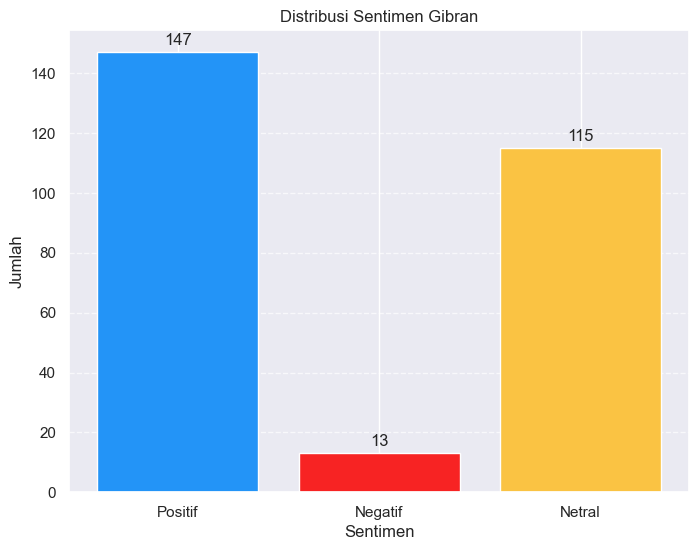

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Gibran")


In [37]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] == n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")


Text: gibran bikin solo eks cak imin mungkin cari panggung politik pas
Classifier: Positif
Classifier Bayes: Positif

Text: dibilangin benar gibran samsul android bukan manusia bu dokteritu alat acak otak jadi buat orang liat otak gesrek gila efek samping tanpa henti maki orang lebih bahaya hati lama2 busuk efek lanjut
Classifier: Negatif
Classifier Bayes: Negatif

Text: gibran hasil bikin solo eks cak imin mungkin ajar cara tampil layar politik
Classifier: Netral
Classifier Bayes: Netral

Text: ijin tamu
Classifier: Netral
Classifier Bayes: Netral

Text: soal sgie mas gibran paling tahu kata cak imin sgie singkat sego goreng iwak endog wis bah kono penting pak ngowah ngowoh
Classifier: Positif
Classifier Bayes: Positif

Text: urang jabar naha ikhlas sebut keun bakal ngadukung gibran ulah poho 2019 dibobodo prabowo
Classifier: Netral
Classifier Bayes: Netral

Text: bukan reprentasi anak muda layak prestasi bagai tokoh anak muda ajar tabrak konstitusi menciptaka sejarah buruk negeri yan

## 7. Testing

In [38]:
# ini testing untuk naive bayes
def classify_text(text, cl):
    analysis = TextBlob(text, classifier=cl)
    return analysis.classify()

data_tweet = list(data['tweet_english'])
polaritas = 0

input_text = input('\nMasukkan teks yang ingin diuji: ')
hasil_klasifikasi = classify_text(input_text, cl)

print(f'\nHasil Klasifikasi untuk Teks yang Dimasukkan: {hasil_klasifikasi}')


Hasil Klasifikasi untuk Teks yang Dimasukkan: Netral


In [39]:
# ini testing untuk textblob
def classify_text(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    # Tentukan kategori berdasarkan nilai polaritas
    if polarity > 0:
        return "Positif"
    elif polarity < 0:
        return "Negatif"
    else:
        return "Netral"

# Contoh pengolahan data dari kolom tweet
data_tweet = list(data['tweet_english'])  # Sesuaikan dengan dataset Anda jika digunakan
polaritas = 0

# Input dari pengguna
input_text = input('\nMasukkan teks yang ingin diuji: ')
hasil_klasifikasi = classify_text(input_text)

print(f'\nHasil Klasifikasi untuk Teks yang Dimasukkan: {hasil_klasifikasi}')



Hasil Klasifikasi untuk Teks yang Dimasukkan: Positif
